In [25]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd


In [26]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')


In [27]:
dataset_ex_df = pd.read_csv('GS.csv', header=0, parse_dates=[0], date_parser=parser)
dataset_ex_df.drop(dataset_ex_df.columns[[1,2,3,5,6]],axis = 1,inplace=True)


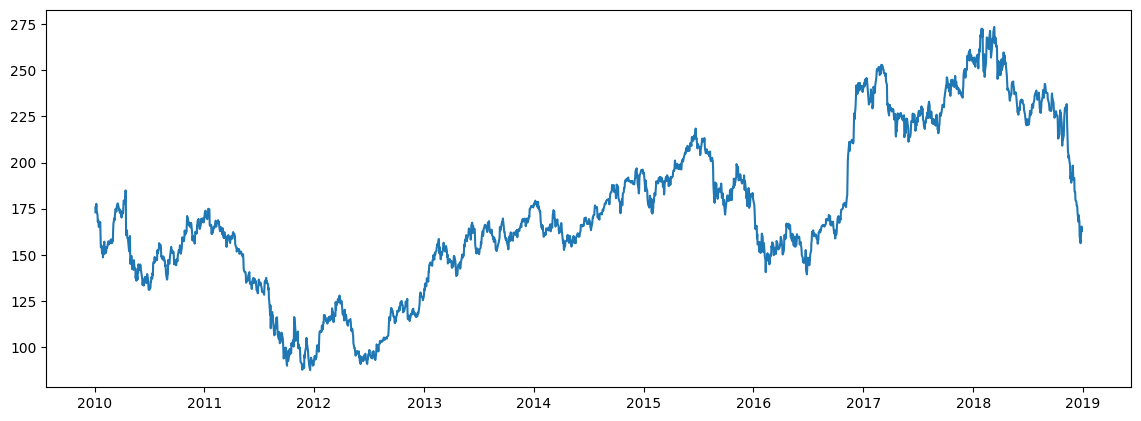

In [28]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(dataset_ex_df['Date'], dataset_ex_df['Close'], label='Goldman Sachs stock')
plt.show()

In [32]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    
    # Create MACD
    #dataset['26ema'] = pd.ewma(dataset['Close'], span=26)
    #dataset['12ema'] = pd.ewma(dataset['Close'], span=12)
    #dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    # Create Bollinger Bands
    #dataset['20sd'] = pd.stats.moments.rolling_std(dataset['Close'],20)
    #dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    #dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

    # Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Close']-1
    
    return dataset


In [35]:
dataset_TI_df = get_technical_indicators(dataset_ex_df)
dataset_TI_df.head(100)

,Date,Close,ma7,ma21,ema,momentum
0,2010-01-04,173.080002,NaN,NaN,173.080002,172.080002
1,2010-01-05,176.139999,NaN,NaN,175.375000,175.139999
2,2010-01-06,174.259995,NaN,NaN,174.603073,173.259995
3,2010-01-07,177.669998,NaN,NaN,176.673248,176.669998
4,2010-01-08,174.309998,NaN,NaN,175.091238,173.309998
...,...,...,...,...,...,...
95,2010-05-20,136.100006,141.611428,147.309524,137.338949,135.100006
96,2010-05-21,140.619995,140.671428,146.431904,139.526313,139.619995
97,2010-05-24,136.690002,139.534286,145.445714,137.635439,135.690002
98,2010-05-25,142.559998,139.438572,144.994762,140.918478,141.559998
